In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("cluster_data.csv")
X = df["Feature 1"]
Y = df["Feature 2"]

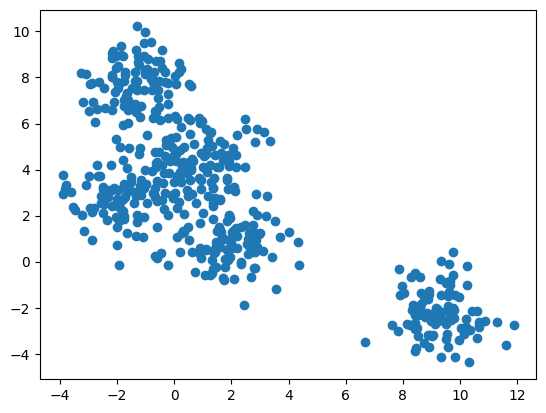

In [3]:
plt.scatter(X, Y)

In [4]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [5]:
def Distance(P1, P2):
    return np.sqrt((P1.x -P2.x)**2 + (P1.y - P2.y)**2)
    ### Enter Code to find distance between 2 points

def Mean(AP):
    ### Write code to find centroid of an group of points
    if len(AP)!=0:
        x=sum(p.x for p in AP)/len(AP)
        y=sum(p.y for p in AP)/len(AP)
        pt=Point(x,y)
        return pt
    else :
        pt=Point(0,0)
        return pt   

In [6]:
def MinPoint(P, AP):
    ### To find the group a point P belongs to given centroids AP
    d = Distance(P, AP[0])
    mind = 0
    for i in range(1, len(AP)):
        if Distance(P, AP[i]) < d:
            d = Distance(P, AP[i])
            mind = i

    return AP[mind]

In [7]:
def equality(A1, A2):
    if len(A1)!=len(A2):
        return False
    for i in range (len(A1)):
        if (A1[i].x!=A2[i].x or A1[i].y!=A2[i].y):
            return False
    return True

    ### Check if A1 and A2 arrays are same or not(same values)

In [11]:
def kMeans(X, Y, k):
    ### kM is the final list of k-Centroids, kMi is initial chosen random points(choose random k points from dataset), and D is dictionary of the groups, {Centroid : [Points in group]}
    randomIds = np.random.randint(0, len(X), k)
    kMi = []
    for index in randomIds:
        kMi.append(Point(X[index], Y[index]))

    kM=kMi
    flag = True
    while(flag):
        D = dict()  # Dictionary
        for centroid in kM:
            D[centroid] = list()
        
        for i in range(len(X)):
            point = Point(X[i], Y[i])
            D[MinPoint(point, kM)].append(point)
        
        temp_centroid_list = list()
        for i, centroid in enumerate(kM):
            temp_centroid_list.append(Mean(D[centroid]))

        if(equality(kM, temp_centroid_list)):
            flag = False
        else:
            kM = temp_centroid_list
    return [kM, kMi, D]

In [12]:
def calculate_SSD(points, centroids, clusters):
    ssd = 0
    for centroid, group in clusters.items():
        for point in group:
            ssd += Distance(point, centroid)**2
    return ssd

    


def Elbow(X, Y):
    ### For 1 to a reasonable value, find out Sum squared distance to centroid/k, and list out in an array to find optimal k using Elbow method
    points = [Point(x, y) for x, y in zip(X, Y)]
    ssd_values = []
    k_values = range(1, 11)  # Test values from 1 to 10 (or a reasonable value)

    for k in k_values:
        kM, kMi, D = kMeans(X, Y, k)
        ssd = calculate_SSD(points, kM, D)
        ssd_values.append(ssd)
    
    # Plotting the Elbow curve
    plt.plot(k_values, ssd_values, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (SSD)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

    return ssd_values

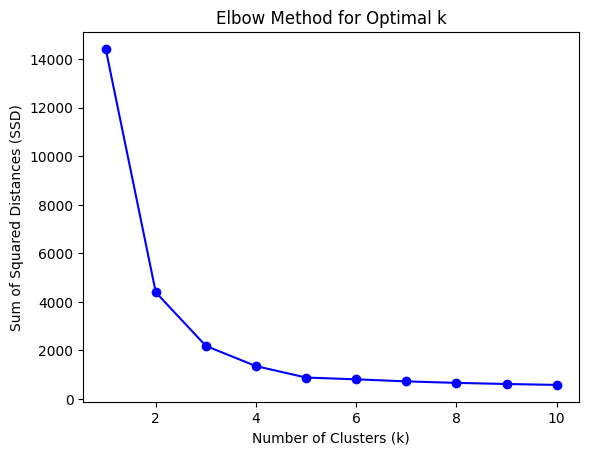

SSD values for different k: [14423.995571116931, 4390.702977889529, 2183.1288051012766, 1351.629371236576, 880.2717191277223, 806.2263726671592, 722.4219150029395, 660.1261854375663, 614.1580061760297, 576.1290576755043]


In [13]:
### Here, plot the elbow curve
ssd_values = Elbow(X, Y)
print("SSD values for different k:", ssd_values)

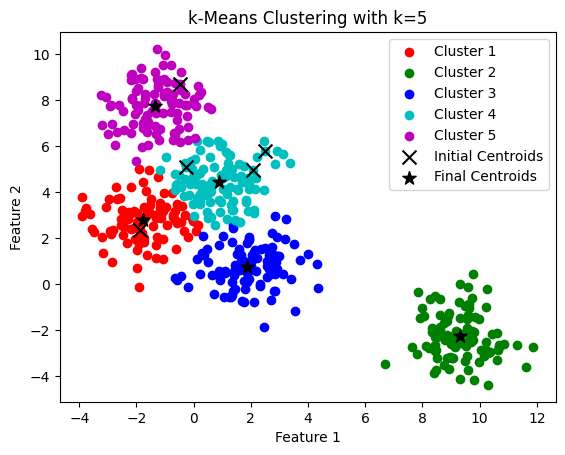

In [19]:
### Here, plot the scatter plot with each point colour coded with the respective groups. And, with initial k centroids, and final k centroids
k = 5
final_centroids, initial_centroids, D = kMeans(X, Y, k)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i, (centroid, cluster_points) in enumerate(D.items()):
    cluster_color = colors[i % len(colors)]
    plt.scatter([p.x for p in cluster_points], [p.y for p in cluster_points], color=cluster_color, label=f'Cluster {i+1}')

plt.scatter([p.x for p in initial_centroids], [p.y for p in initial_centroids], color='k', marker='x', s=100, label='Initial Centroids')

plt.scatter([p.x for p in final_centroids], [p.y for p in final_centroids], color='k', marker='*', s=100, label='Final Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-Means Clustering with k={k}')
plt.legend()
plt.show()